In [503]:
import pandas as pd

twitter202002 = pd.read_csv("tweet_activity_metrics_light940_20200201_20200301_ja.csv", sep=",")
twitter202003 = pd.read_csv("tweet_activity_metrics_light940_20200301_20200323_ja.csv", sep=",")
twitter_all = pd.concat([twitter202002, twitter202003])
# 必要なデータだけピックアップ
twitter_all_simple = twitter_all[['ツイートID', 
                                  'ツイート本文', 
                                  '時間', 
                                  'インプレッション', 
                                  'エンゲージメント',
                                  'エンゲージメント率',
                                  'リツイート',
                                  '返信',
                                  'いいね']]
# twitter_all_simple
# twitter_all_simple.sort_values('いいね', ascending=False)

In [496]:
import datetime

# 時間を3つに分類
def cast_date(x):
    datetime_utc = datetime.datetime.strptime(x, "%Y-%m-%d %H:%M %z")
    datetime_jst = datetime_utc.astimezone(datetime.timezone(datetime.timedelta(hours=+9)))
    hour = datetime_jst.hour
#     hour = int(str(x)[11:13])
    if hour >= 6 and hour < 12:
        return '朝'
    elif hour >= 12 and hour < 18:
        return '昼'
    elif (hour >= 18 and hour <= 24) or (hour >= 0 and hour < 6):
        return '夜'

# 時間を切り取る
def cut_hour(x):
    datetime_utc = datetime.datetime.strptime(x, "%Y-%m-%d %H:%M %z")
    datetime_jst = datetime_utc.astimezone(datetime.timezone(datetime.timedelta(hours=+9)))
    return datetime_jst.hour

twitter_all_add_date = twitter_all_simple.copy()
twitter_all_add_date['朝昼夜'] = twitterAllSimple['時間'].apply(lambda x : cast_date(x))
twitter_all_add_date['時'] = twitter_all_simple['時間'].apply(lambda x : cut_hour(x))

# twitterAllSimple['いいね'].apply(lambda x : x*20)
# twitterAllSimple = twitterAllSimple.apply(lambda x : x['いいね']*20, axis=1)
# twitterAllSimple.dtypes
# twitter_all_add_date
# twitterAllSimple

In [498]:
# twitter_all_add_date.groupby('時').mean()
# twitter_all_add_date.groupby('時').sum()
# twitter_all_add_date.groupby('時').count()

# twitter_all_add_date.groupby('朝昼夜').size()
# twitter_all_add_date.groupby('朝昼夜').size().keys
# twitter_all_add_date.groupby('朝昼夜').size().values
# twitter_all_add_date.groupby('朝昼夜').describe()

* [matplotlib でヒストグラムを描く](https://pythondatascience.plavox.info/matplotlib/%E3%83%92%E3%82%B9%E3%83%88%E3%82%B0%E3%83%A9%E3%83%A0)
* [matplotlibのレイアウト調節](https://qiita.com/aurueps/items/d04a3bb127e2d6e6c21b)

Text(0, 0.5, 'tweet count')

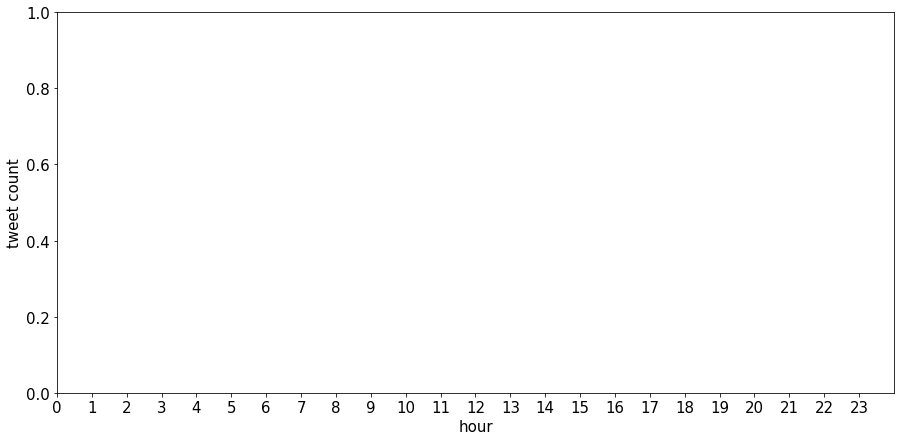

In [504]:
import matplotlib.pyplot as plt
import numpy as np

# fig, ax = plt.subplots(facecolor="w")
# ax.plot(x, y)

x = twitter_all_add_date['時'].values
# x = twitter_all_add_date.groupby('時').count()

plt.xlim(0, 24) # (1) x軸の表示範囲
plt.xticks(range(24))
plt.rcParams["figure.figsize"] = [15,7] # 図の縦横のサイズ([横(inch),縦(inch)])
plt.rcParams["font.size"] = 15 # フォントサイズ デフォルト12
plt.xlabel("hour")
plt.ylabel("tweet count")
# plt.hist(x, rwidth=0.7, bins=np.arange(-1, 24)+0.5)
# plt.hist(x, rwidth=0.7, bins=24)


In [370]:
# date_data = twitter_all_add_date.groupby('朝昼夜').size()
# plt.bar(np.arange(len(date_data)), date_data.values)

In [505]:
from scipy import stats

# いいね数
# morning = twitter_all_add_date.query("朝昼夜 == '朝'")['いいね']
# noon = twitter_all_add_date.query("朝昼夜 == '昼'")['いいね']
# evening = twitter_all_add_date.query("朝昼夜 == '夜'")['いいね']
# インプレッション
morning = twitter_all_add_date.query("朝昼夜 == '朝'")['インプレッション']
noon = twitter_all_add_date.query("朝昼夜 == '昼'")['インプレッション']
evening = twitter_all_add_date.query("朝昼夜 == '夜'")['インプレッション']

# print('朝平均：', np.mean(morning))
# print('昼平均：', np.mean(noon))
# print('夜平均：', np.mean(evening))

# 朝昼夜で有意差があるものを判定
# print('朝と昼のウェルチのt検定:', stats.ttest_ind(morning, noon, equal_var=False))
# print('朝と夜のウェルチのt検定:', stats.ttest_ind(morning, evening, equal_var=False))
# print('昼と夜のウェルチのt検定:', stats.ttest_ind(noon, evening, equal_var=False))

# print('朝と昼のウィルコクソンの順位和検定:', stats.mannwhitneyu(morning, noon, alternative='two-sided'))
# print('朝と夜のウィルコクソンの順位和検定:', stats.mannwhitneyu(morning, evening, alternative='two-sided'))
# print('昼と夜のウィルコクソンの順位和検定:', stats.mannwhitneyu(noon, evening, alternative='two-sided'))

In [506]:
# 有意差がありそうな変数の具体的な値を見てみる
# twitter_all_add_date.query("朝昼夜 == '朝'").sort_values('いいね', ascending=False)
# twitter_all_add_date.query("朝昼夜 == '朝'").sort_values('インプレッション', ascending=False)
# twitter_all_add_date.query("朝昼夜 == '夜'").sort_values('いいね', ascending=False)
# twitter_all_add_date.query("朝昼夜 == '夜'").sort_values('インプレッション', ascending=False)

In [508]:
# インプレッションといいねの相関

# 外れ値削除
twitter_all_simple_shaping = twitter_all_simple[twitter_all_simple['ツイートID'] != 1238040860505202689]

impression = twitter_all_simple_shaping[['インプレッション']]
good = twitter_all_simple_shaping[['いいね']]
# impression.sort_values('インプレッション', ascending=False)

# twitter_all_simple_shaping.sort_values('インプレッション', ascending=False)

Text(0, 0.5, 'good')

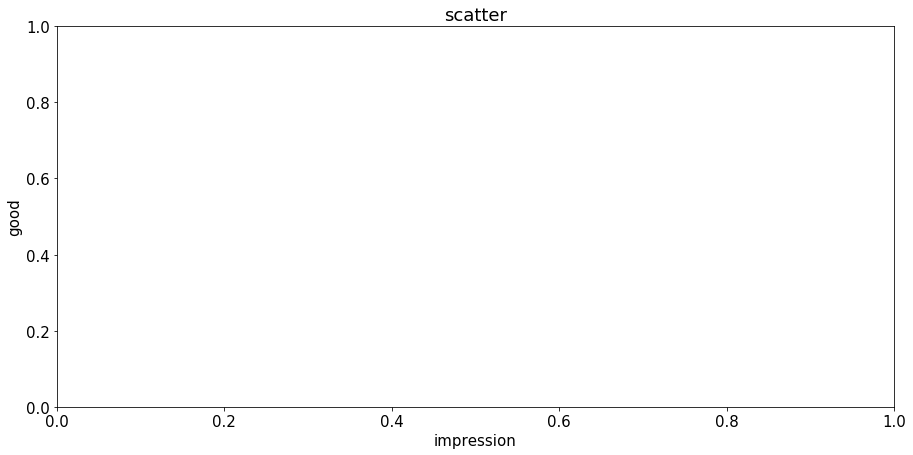

In [509]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [15,7] # 図の縦横のサイズ([横(inch),縦(inch)])
plt.rcParams["font.size"] = 15 # フォントサイズ デフォルト12
plt.title("scatter")
plt.xlabel("impression")
plt.ylabel("good")
# plt.scatter(impression, good, s=20, alpha=0.5)

In [510]:
# statsmodelsを使った回帰分析
import statsmodels.api as sm
from sklearn import linear_model

model = linear_model.LinearRegression()
model.fit(impression.values, good.values)

sm_model = sm.OLS(good, sm.add_constant(impression))
result = sm_model.fit(disp=0)
# print(result.summary())

/opt/conda/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Text(0, 0.5, 'good')

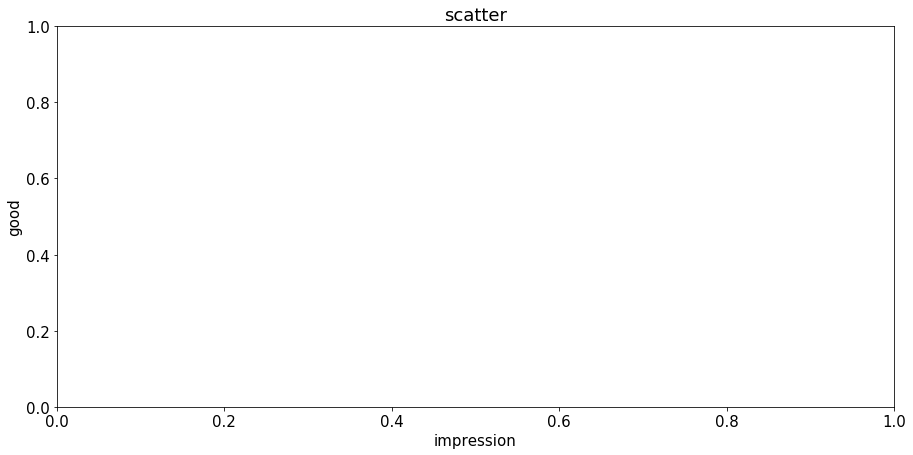

In [512]:
# 回帰直線
plt.rcParams["figure.figsize"] = [15,7] # 図の縦横のサイズ([横(inch),縦(inch)])
plt.rcParams["font.size"] = 15 # フォントサイズ デフォルト12
plt.title("scatter")
plt.xlabel("impression")
plt.ylabel("good")
# plt.scatter(impression, good, s=20, alpha=0.5)
# plt.plot(impression.values, model.predict(impression.values), color='black')